<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span><ul class="toc-item"><li><span><a href="#Json-to-csv---merge-all-jsons-into-one-csv" data-toc-modified-id="Json-to-csv---merge-all-jsons-into-one-csv-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Json to csv - merge all jsons into one csv</a></span></li><li><span><a href="#Flattening-JSons---from-kaggle" data-toc-modified-id="Flattening-JSons---from-kaggle-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Flattening JSons - from kaggle</a></span></li><li><span><a href="#In-a-loop-on-real-data-now" data-toc-modified-id="In-a-loop-on-real-data-now-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>In a loop on real data now</a></span></li><li><span><a href="#Correlation-of-Columns" data-toc-modified-id="Correlation-of-Columns-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Correlation of Columns</a></span></li><li><span><a href="#Regression-on-this-dataset" data-toc-modified-id="Regression-on-this-dataset-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Regression on this dataset</a></span><ul class="toc-item"><li><span><a href="#With-ADAM-intead-of-RMSProp" data-toc-modified-id="With-ADAM-intead-of-RMSProp-1.5.1"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>With ADAM intead of RMSProp</a></span></li></ul></li></ul></li><li><span><a href="#Writing-a-flexible-hyperparameter-search-model" data-toc-modified-id="Writing-a-flexible-hyperparameter-search-model-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Writing a flexible hyperparameter search model</a></span></li><li><span><a href="#End-bookmark" data-toc-modified-id="End-bookmark-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>End bookmark</a></span></li></ul></div>

# Imports

In [1]:
import pandas as pd
import os
import glob
import numpy as np
import json
from IPython.display import clear_output

In [2]:
trace_files = glob.glob('./tracelyzer//*.json')
trace_files

['./tracelyzer\\11600-state-metrics_run_0.json',
 './tracelyzer\\11600-state-metrics_run_1.json',
 './tracelyzer\\11600-state-metrics_run_2.json',
 './tracelyzer\\11600-state-metrics_run_3.json',
 './tracelyzer\\11600-state-metrics_run_4.json',
 './tracelyzer\\11600-state-metrics_run_5.json',
 './tracelyzer\\11600-state-metrics_run_6.json',
 './tracelyzer\\11600-state-metrics_run_7.json',
 './tracelyzer\\11600-state-metrics_run_8.json',
 './tracelyzer\\11600-state-metrics_run_9.json',
 './tracelyzer\\1180-state-metrics_run_0.json',
 './tracelyzer\\1180-state-metrics_run_1.json',
 './tracelyzer\\1180-state-metrics_run_2.json',
 './tracelyzer\\1180-state-metrics_run_3.json',
 './tracelyzer\\1180-state-metrics_run_4.json',
 './tracelyzer\\1180-state-metrics_run_5.json',
 './tracelyzer\\1180-state-metrics_run_6.json',
 './tracelyzer\\1180-state-metrics_run_7.json',
 './tracelyzer\\1180-state-metrics_run_8.json',
 './tracelyzer\\1180-state-metrics_run_9.json',
 './tracelyzer\\12333-state-me

In [3]:
jsondf = pd.DataFrame()

In [9]:
# dataframe = pd.DataFrame.from_dict(a_json, orient="index")
testdf = pd.DataFrame.from_dict(jsonstr['metrics'][0],orient="index").T
testdf.append(pd.DataFrame.from_dict(jsonstr['metrics'][1],orient="index").T)

,name,value
0,Timestamp,136367
0,AudioHandlers,0


In [10]:
tempdf = pd.DataFrame(columns=['name','value'])
for i in range(len(metrics)):
#     print(metrics[i]['name'], metrics[i]['value'])
    tempdf.loc[i] = [metrics[i]['name'], float(metrics[i]['value'])]#['name' + str(i)] + list(randint(10, size=2))
tempdf.T

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
name,Timestamp,AudioHandlers,Documents,Frames,JSEventListeners,LayoutObjects,MediaKeySessions,MediaKeys,Nodes,Resources,...,V8CompileDuration,TaskDuration,TaskOtherDuration,ThreadTime,ProcessTime,JSHeapUsedSize,JSHeapTotalSize,FirstMeaningfulPaint,DomContentLoaded,NavigationStart
value,136367,0,4,2,168,7430,0,0,7548,25,...,0.184432,5.45894,1.39681,5.03259,12.7031,5.68768e+08,5.94432e+08,0,136366,136360


In [7]:
for file in trace_files:
    with open(file) as f:
        jsonstr = json.load(f)
        metrics = jsonstr['metrics']
        tempdf = pd.DataFrame(columns=['name','value'])
        for i in range(len(metrics)):
        #     print(metrics[i]['name'], metrics[i]['value'])
            tempdf.loc[i] = [metrics[i]['name'], float(metrics[i]['value'])]#['name' + str(i)] + list(randint(10, size=2))
    

In [8]:
tempdf

,name,value
0,Timestamp,1.363665e+05
1,AudioHandlers,0.000000e+00
2,Documents,4.000000e+00
3,Frames,2.000000e+00
4,JSEventListeners,1.680000e+02
5,LayoutObjects,7.430000e+03
6,MediaKeySessions,0.000000e+00
7,MediaKeys,0.000000e+00
8,Nodes,7.548000e+03
9,Resources,2.500000e+01


In [12]:
for file in trace_files:
    with open(file) as f:
        jsonstr = json.load(f)
        print(jsonstr)
        df = pd.DataFrame({'value': jsonstr})

{'profiling': {'categories': {'scripting': 4024.106999963522, 'rendering': 258.52699983119965, 'painting': 29.82100000977516, 'loading': 7.770000070333481}, 'events': {'JS Frame': 3496.833000123501, 'Minor GC': 341.083999812603, 'Recalculate Style': 199.02399998903275, 'Compile Script': 170.64700001478195, 'Layout': 45.62799996137619, 'Paint': 21.669999986886978, 'Update Layer Tree': 8.9339998960495, 'Composite Layers': 8.151000022888184, 'Evaluate Script': 6.902000039815903, 'Run Microtasks': 6.210999995470047, 'Parse HTML': 6.13700008392334, 'Hit Test': 4.940999984741211, 'Major GC': 2.2260000109672546, 'Parse Stylesheet': 1.632999986410141, 'Animation Frame Fired': 0.20399996638298035}, 'functions': {'MinorGC': 341.083999812603, 'UpdateLayoutTree': 199.02399998903275, 'v8.compile': 170.64700001478195, 'f:@22': 153.9800000190735, 'f:@60': 149.24300000071526, 'f:_updateStyle@7': 92.02800053358078, 'f:@50': 85.19499999284744, 'f:project@7': 84.92999997735023, 'f:_projectLatlngs@7': 80.

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [13]:
df

,value
metrics,"[{'name': 'Timestamp', 'value': 136366.518513}..."
profiling,{'categories': {'scripting': 3902.371000111103...
rendering,"{'firstPaint': 6.039913, 'forcedReflowEvents':..."


In [20]:
# for file in trace_files:
#     with open(file,'r') as f:
#         lines = f.read()
#         runs = lines.split("--------------------")
#         for run in runs:
#             if len(run) > 1:
#                 submetrics = run.split('\n')
#                 jsons = []
#                 for m in submetrics:
#                     if m != '':
#                         if json.loads(m):
#                             metric = json.loads(m)
#                             jsons.append(metric)
#                             with pd.read_json(metric) as tempdf:
#                                 print(tempdf)
                            
#                 jsons[0].update(jsons[1])
#                 with open(f'{file}-merged.json','a') as fw:
#                     json.dump(jsons[0],fw)
#                     print(json.dumps(jsons[0]))
#             clear_output(wait=False)

In [22]:
# len(run)

## Json to csv - merge all jsons into one csv

Life can and should be simpler

In [23]:
def flatten_json(y):
    out = {}

    def flatten(x, name=''):
        if type(x) is dict:
            for a in x:
                flatten(x[a], name + a + '_')
        elif type(x) is list:
            i = 0
            for a in x:
                flatten(a, name + str(i) + '_')
                i += 1
        else:
            out[name[:-1]] = x
    flatten(y)
    return out

In [24]:
jsonstr.keys()

dict_keys(['profiling', 'rendering', 'metrics'])

In [25]:
flatten_json(jsonstr['rendering'])

{'firstPaint': 6.039913,
 'forcedReflowEvents': 5,
 'fps_mean': 1.39,
 'fps_variance': 3560.77,
 'fps_sd': 59.67,
 'fps_lo': 0.28,
 'fps_hi': 86.51}

In [26]:
list[flatten_json(jsonstr[g]) for g in jsonstr.keys() ] 

[{'categories_scripting': 3902.371000111103,
  'categories_rendering': 175.86000004410744,
  'categories_painting': 27.163000136613846,
  'categories_loading': 7.374999910593033,
  'events_JS Frame': 3377.8310001790524,
  'events_Minor GC': 323.56199994683266,
  'events_Compile Script': 184.43099999427795,
  'events_Recalculate Style': 129.9470000565052,
  'events_Layout': 36.95100003480911,
  'events_Paint': 15.873000085353851,
  'events_Composite Layers': 11.290000051259995,
  'events_Update Layer Tree': 7.503999978303909,
  'events_Evaluate Script': 7.224999964237213,
  'events_Run Microtasks': 6.26800000667572,
  'events_Parse HTML': 6.1559998691082,
  'events_Major GC': 2.2939999997615814,
  'events_Hit Test': 1.457999974489212,
  'events_Parse Stylesheet': 1.2190000414848328,
  'events_Animation Frame Fired': 0.7600000202655792,
  'functions_MinorGC': 323.56199994683266,
  'functions_v8.compile': 184.43099999427795,
  'functions_f:@60': 159.49699997901917,
  'functions_f:@22': 15

## Flattening JSons - from kaggle

In [21]:
import json 
import pandas as pd 
from pandas import json_normalize #package for flattening json in pandas df

In [22]:
#load json object
with open(trace_files[0]) as f:
    d = json.load(f)

#lets put the data into a pandas df
#clicking on raw_nyc_phil.json under "Input Files"
#tells us parent node is 'programs'
nycphil = json_normalize(d['profiling']['categories'])
nycphil.head(3)

,scripting,rendering,painting,loading
0,6341.637,725.52,119.798,9.032


In [23]:
nycphil1 = json_normalize(d['profiling']['events'])
nycphil1.head(3)

,JS Frame,Minor GC,Recalculate Style,Compile Script,Layout,Paint,Composite Layers,Update Layer Tree,Hit Test,Major GC,Parse HTML,Evaluate Script,Run Microtasks,Parse Stylesheet,Animation Frame Fired
0,5512.674,623.246,619.592,182.273,67.331,64.031,55.767,25.863,12.734,9.269,7.479,7.141,6.421,1.553,0.613


In [24]:
nycphil2 = json_normalize(d['rendering'])
nycphil2.head(3)

,firstPaint,forcedReflowEvents,fps.mean,fps.variance,fps.sd,fps.lo,fps.hi
0,9.200257,5,0.45,82574.36,287.36,0.19,406.83


In [25]:
nycphil3 = json_normalize(data=d['metrics'], meta=['name','value'])#json_normalize(d['metrics'])
nycphil3 = nycphil3.set_index('name')
# nycphil3 = nycphil3.rename(columns={"value": "0"})
nycphil3 = nycphil3.T
nycphil3.head(3)

name,Timestamp,AudioHandlers,Documents,Frames,JSEventListeners,LayoutObjects,MediaKeySessions,MediaKeys,Nodes,Resources,...,V8CompileDuration,TaskDuration,TaskOtherDuration,ThreadTime,ProcessTime,JSHeapUsedSize,JSHeapTotalSize,FirstMeaningfulPaint,DomContentLoaded,NavigationStart
value,59609.926264,0.0,4.0,2.0,166.0,38297.0,0.0,0.0,38395.0,25.0,...,0.182287,8.493343,1.471183,7.683256,23.140625,690223896.0,725446656.0,0.0,59609.048028,59600.700434


In [26]:
nycphil.shape, nycphil1.shape, nycphil2.shape, nycphil3.shape

((1, 4), (1, 15), (1, 7), (1, 35))

In [27]:
for col in nycphil1:
    nycphil[col] = nycphil1[col]
nycphil

,scripting,rendering,painting,loading,JS Frame,Minor GC,Recalculate Style,Compile Script,Layout,Paint,Composite Layers,Update Layer Tree,Hit Test,Major GC,Parse HTML,Evaluate Script,Run Microtasks,Parse Stylesheet,Animation Frame Fired
0,6341.637,725.52,119.798,9.032,5512.674,623.246,619.592,182.273,67.331,64.031,55.767,25.863,12.734,9.269,7.479,7.141,6.421,1.553,0.613


In [28]:
for col in nycphil2:
    nycphil[col] = nycphil2[col]
nycphil

,scripting,rendering,painting,loading,JS Frame,Minor GC,Recalculate Style,Compile Script,Layout,Paint,...,Run Microtasks,Parse Stylesheet,Animation Frame Fired,firstPaint,forcedReflowEvents,fps.mean,fps.variance,fps.sd,fps.lo,fps.hi
0,6341.637,725.52,119.798,9.032,5512.674,623.246,619.592,182.273,67.331,64.031,...,6.421,1.553,0.613,9.200257,5,0.45,82574.36,287.36,0.19,406.83


In [29]:
for col in nycphil3:
#     print(nycphil3[col])
    nycphil[col] = nycphil3.iloc[0][col]
nycphil

,scripting,rendering,painting,loading,JS Frame,Minor GC,Recalculate Style,Compile Script,Layout,Paint,...,V8CompileDuration,TaskDuration,TaskOtherDuration,ThreadTime,ProcessTime,JSHeapUsedSize,JSHeapTotalSize,FirstMeaningfulPaint,DomContentLoaded,NavigationStart
0,6341.637,725.52,119.798,9.032,5512.674,623.246,619.592,182.273,67.331,64.031,...,0.182287,8.493343,1.471183,7.683256,23.140625,690223896.0,725446656.0,0.0,59609.048028,59600.700434


In [30]:
nycphil.shape

(1, 61)

In [34]:
int(trace_file.split('\\')[1].split('-')[0])

67995

In [43]:
tempdf = mydf.copy()
for i in range(tempdf.count()[0]):
    tempdf[int(trace_file.split('\\')[1].split('-')[0])] = tempdf.iloc[i]
#     print(tempdf.iloc[i])

In [44]:
tempdf

,scripting,rendering,painting,loading,JS Frame,Minor GC,Recalculate Style,Compile Script,Layout,Paint,...,TaskDuration,TaskOtherDuration,ThreadTime,ProcessTime,JSHeapUsedSize,JSHeapTotalSize,FirstMeaningfulPaint,DomContentLoaded,NavigationStart,67995
0,6341.637,725.520,119.798,9.032,5512.674,623.246,619.592,182.273,67.331,64.031,...,8.493343,1.471183,7.683256,23.140625,690223896.0,725446656.0,0.000000,59609.048028,59600.700434,NaN
0,6279.347,697.707,141.213,7.678,5455.967,618.816,607.186,181.672,64.997,66.015,...,8.393110,1.443977,7.625107,22.921875,691439204.0,722673664.0,0.000000,59623.988331,59615.869128,NaN
0,6392.054,718.347,135.266,9.833,5547.933,628.051,610.933,193.480,68.984,63.861,...,8.516173,1.446168,7.703450,22.703125,691554144.0,724705280.0,0.000000,59639.021622,59630.831322,NaN
0,6331.128,725.726,130.015,8.776,5511.765,616.853,620.782,179.314,65.591,65.260,...,8.445664,1.430798,7.650164,22.343750,691043024.0,723656704.0,0.000000,59654.179347,59646.021305,NaN
0,6305.508,718.758,130.909,9.113,5480.298,619.523,615.193,181.038,65.734,64.238,...,8.411932,1.427778,7.646240,23.015625,691571620.0,725557248.0,0.000000,59669.338855,59661.235626,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,8396.189,1246.807,212.754,10.383,7274.634,918.714,1068.368,168.196,94.118,110.517,...,11.310659,1.762698,10.307235,32.312500,951712720.0,992256000.0,0.000000,41254.569073,41244.440236,NaN
0,8404.487,1291.289,220.360,8.801,7239.204,906.049,1081.890,169.347,93.861,109.479,...,12.535630,3.015573,12.281932,79.265625,942054312.0,973144064.0,41278.328138,41276.902950,41266.823510,NaN
0,8325.668,1244.845,213.197,9.617,7225.767,901.506,1066.766,166.085,93.448,109.640,...,11.252206,1.775842,10.286320,32.578125,950078432.0,990945280.0,0.000000,41330.431647,41320.359375,NaN
0,8579.513,1283.490,214.465,8.265,7359.211,914.362,1086.363,167.456,90.431,108.896,...,13.251640,3.607493,13.822540,109.703125,811606996.0,840830976.0,0.000000,41352.857715,41342.691084,NaN


## In a loop on real data now

In [27]:
import json 
import pandas as pd 
from pandas import json_normalize #package for flattening json in pandas df
from tqdm import trange, tqdm

In [28]:
trace_files = glob.glob('./tracelyzer_orig//*.json')
trace_files

['./tracelyzer_orig\\11600-state-metrics_run_0.json',
 './tracelyzer_orig\\11600-state-metrics_run_1.json',
 './tracelyzer_orig\\11600-state-metrics_run_2.json',
 './tracelyzer_orig\\11600-state-metrics_run_3.json',
 './tracelyzer_orig\\11600-state-metrics_run_4.json',
 './tracelyzer_orig\\11600-state-metrics_run_5.json',
 './tracelyzer_orig\\11600-state-metrics_run_6.json',
 './tracelyzer_orig\\11600-state-metrics_run_7.json',
 './tracelyzer_orig\\11600-state-metrics_run_8.json',
 './tracelyzer_orig\\11600-state-metrics_run_9.json',
 './tracelyzer_orig\\1180-state-metrics_run_0.json',
 './tracelyzer_orig\\1180-state-metrics_run_1.json',
 './tracelyzer_orig\\1180-state-metrics_run_2.json',
 './tracelyzer_orig\\1180-state-metrics_run_3.json',
 './tracelyzer_orig\\1180-state-metrics_run_4.json',
 './tracelyzer_orig\\1180-state-metrics_run_5.json',
 './tracelyzer_orig\\1180-state-metrics_run_6.json',
 './tracelyzer_orig\\1180-state-metrics_run_7.json',
 './tracelyzer_orig\\1180-state-metr

In [29]:
shape_data = [int(trace_file.split('\\')[1].split('-')[0]) for trace_file in trace_files]
shape_data
from collections import Counter
sCounter = Counter(shape_data)
shapesdf = pd.DataFrame().from_dict({'value':dict(sCounter)})
shapesdf.shape, shapesdf

((56, 1),
        value
 1180      10
 1347      10
 2873      10
 3559      10
 4327      10
 5109       4
 5576       5
 6262       5
 7075       2
 7092       5
 7309       1
 11600     10
 12333      5
 12849     10
 13617     10
 13666      1
 13679     10
 13896     10
 14075     10
 18287     10
 20253     10
 20584     10
 20882     10
 24003     10
 25511     10
 26336     10
 27106     10
 28221     10
 29361     10
 29716     10
 31112     10
 32587     10
 33983     10
 35319     10
 35980     10
 37373     10
 38176     10
 38863     10
 39157     10
 41163     10
 41662     10
 46568     10
 48760     10
 48965     10
 51913     10
 52959     10
 53787     10
 57004     10
 57247     10
 58350     10
 58572     10
 60069     10
 65323     10
 65911     10
 66095     10
 67995     10)

In [30]:
mydf = pd.DataFrame()
#load json object
for trace_file in trace_files:
    with open(trace_file) as f:
        try:
            d = json.load(f)
        except:
            print(f'file: {file} cannot be read')
        
        #lets put the data into a pandas df
        #clicking on raw_nyc_phil.json under "Input Files"
        #tells us parent node is 'programs'
        nycphil = json_normalize(d['profiling']['categories'])
#         print(nycphil.head(3))
        
        nycphil1 = json_normalize(d['profiling']['events'])
#         print(nycphil1.head(3))
        
        nycphil2 = json_normalize(d['rendering'])
#         print(nycphil2.head(3))
        
        nycphil3 = json_normalize(data=d['metrics'], meta=['name','value'])#json_normalize(d['metrics'])
        nycphil3 = nycphil3.set_index('name')
        # nycphil3 = nycphil3.rename(columns={"value": "0"})
        nycphil3 = nycphil3.T
#         print(nycphil3.head(3))
        
#         print(nycphil.shape, nycphil1.shape, nycphil2.shape, nycphil3.shape)
        
        for col in nycphil1:
            nycphil[col] = nycphil1[col]
            
        for col in nycphil2:
            nycphil[col] = nycphil2[col]
        
        for col in nycphil3:
        #     print(nycphil3[col])
            nycphil[col] = nycphil3.iloc[0][col]
        
#         print(nycphil.shape)
    mydf = nycphil if not mydf.count().any() else mydf.append(nycphil)

mydf

,scripting,rendering,painting,loading,JS Frame,Minor GC,Recalculate Style,Compile Script,Layout,Paint,...,V8CompileDuration,TaskDuration,TaskOtherDuration,ThreadTime,ProcessTime,JSHeapUsedSize,JSHeapTotalSize,FirstMeaningfulPaint,DomContentLoaded,NavigationStart
0,4024.107,258.527,29.821,7.770,3496.833,341.084,199.024,170.647,45.628,21.670,...,0.170650,5.559310,1.295403,5.110484,13.281250,578982240.0,606568448.0,0.0,135045.205511,135039.352364
0,3992.477,246.942,34.918,8.090,3455.408,344.754,198.120,176.735,39.982,21.392,...,0.176742,5.535281,1.312024,5.115612,13.437500,578974656.0,606044160.0,0.0,135055.240359,135049.419732
0,4019.479,245.804,29.737,8.943,3488.993,344.298,197.057,171.945,40.100,22.284,...,0.171951,5.568813,1.318260,5.129816,13.671875,578975932.0,605782016.0,0.0,135065.378928,135059.517147
0,3999.914,245.636,31.246,9.690,3470.620,340.493,196.409,173.177,40.213,22.142,...,0.173155,5.571211,1.341521,5.127441,12.843750,579004920.0,606830592.0,0.0,135075.543793,135069.676690
0,4620.789,270.111,33.084,10.673,3924.273,383.080,211.554,296.780,42.144,23.638,...,0.296786,6.274867,1.407121,5.603333,14.234375,578979804.0,606306304.0,0.0,135086.321911,135079.798415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,4224.692,169.569,16.675,9.710,3665.334,354.124,125.088,190.073,38.153,14.157,...,0.190086,5.704033,1.317737,5.132829,12.343750,567883836.0,590499840.0,0.0,136304.094821,136298.020681
0,3872.961,166.847,23.788,9.260,3347.180,317.458,122.084,192.609,36.909,15.290,...,0.192605,5.411753,1.381997,4.984258,13.156250,567831628.0,590499840.0,0.0,136314.180857,136308.243316
0,3870.943,171.404,18.046,8.555,3355.146,319.959,126.736,181.254,37.142,14.376,...,0.181253,5.367911,1.334767,4.934539,11.953125,568042836.0,590499840.0,0.0,136324.252198,136318.506014
0,3879.705,167.397,36.460,8.398,3369.205,314.602,121.495,180.672,35.747,15.527,...,0.180673,5.383438,1.347687,4.955420,12.390625,567949748.0,590499840.0,0.0,136334.200964,136328.467998


In [31]:
mydf

,scripting,rendering,painting,loading,JS Frame,Minor GC,Recalculate Style,Compile Script,Layout,Paint,...,V8CompileDuration,TaskDuration,TaskOtherDuration,ThreadTime,ProcessTime,JSHeapUsedSize,JSHeapTotalSize,FirstMeaningfulPaint,DomContentLoaded,NavigationStart
0,4024.107,258.527,29.821,7.770,3496.833,341.084,199.024,170.647,45.628,21.670,...,0.170650,5.559310,1.295403,5.110484,13.281250,578982240.0,606568448.0,0.0,135045.205511,135039.352364
0,3992.477,246.942,34.918,8.090,3455.408,344.754,198.120,176.735,39.982,21.392,...,0.176742,5.535281,1.312024,5.115612,13.437500,578974656.0,606044160.0,0.0,135055.240359,135049.419732
0,4019.479,245.804,29.737,8.943,3488.993,344.298,197.057,171.945,40.100,22.284,...,0.171951,5.568813,1.318260,5.129816,13.671875,578975932.0,605782016.0,0.0,135065.378928,135059.517147
0,3999.914,245.636,31.246,9.690,3470.620,340.493,196.409,173.177,40.213,22.142,...,0.173155,5.571211,1.341521,5.127441,12.843750,579004920.0,606830592.0,0.0,135075.543793,135069.676690
0,4620.789,270.111,33.084,10.673,3924.273,383.080,211.554,296.780,42.144,23.638,...,0.296786,6.274867,1.407121,5.603333,14.234375,578979804.0,606306304.0,0.0,135086.321911,135079.798415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,4224.692,169.569,16.675,9.710,3665.334,354.124,125.088,190.073,38.153,14.157,...,0.190086,5.704033,1.317737,5.132829,12.343750,567883836.0,590499840.0,0.0,136304.094821,136298.020681
0,3872.961,166.847,23.788,9.260,3347.180,317.458,122.084,192.609,36.909,15.290,...,0.192605,5.411753,1.381997,4.984258,13.156250,567831628.0,590499840.0,0.0,136314.180857,136308.243316
0,3870.943,171.404,18.046,8.555,3355.146,319.959,126.736,181.254,37.142,14.376,...,0.181253,5.367911,1.334767,4.934539,11.953125,568042836.0,590499840.0,0.0,136324.252198,136318.506014
0,3879.705,167.397,36.460,8.398,3369.205,314.602,121.495,180.672,35.747,15.527,...,0.180673,5.383438,1.347687,4.955420,12.390625,567949748.0,590499840.0,0.0,136334.200964,136328.467998


In [40]:
# is_NaN = mydf.isnull()
# row_has_NaN = is_NaN.any(axis=1)
# nans = mydf.loc[row_has_NaN == True]
# nans.to_csv('nans.csv')
mydf = mydf.fillna('0')

In [41]:
mydf.to_csv('metric-dataframe-8Dec2020.csv')

## Correlation of Columns

In [53]:
done = u'\u2713'
todo = u'\u2610'
done_list = [
    'Nodes','JSHeapUsedSize','JSHeapTotalSize'
     ,'scripting','rendering','painting','loading',
     'TaskDuration','ThreadTime','ProcessTime'
    ,'RecalcStyleCount'
    ,'LayoutDuration'
    ,'RecalcStyleDuration'
    ,'DevToolsCommandDuration'
    ,'ScriptDuration'
    ,'V8CompileDuration'
    ,'TaskOtherDuration'
            ]
for func in done_list:
    funcname = func.split("(")[0]
    print(done + funcname)
for func in [col for col in list(mydf.columns) if col not in done_list]:
    funcname = func.split("(")[0]
    print(todo + funcname)

✓Nodes
✓JSHeapUsedSize
✓JSHeapTotalSize
✓scripting
✓rendering
✓painting
✓loading
✓TaskDuration
✓ThreadTime
✓ProcessTime
✓RecalcStyleCount
✓LayoutDuration
✓RecalcStyleDuration
✓DevToolsCommandDuration
✓ScriptDuration
✓V8CompileDuration
✓TaskOtherDuration
☐JS Frame
☐Minor GC
☐Recalculate Style
☐Compile Script
☐Layout
☐Paint
☐Update Layer Tree
☐Composite Layers
☐Evaluate Script
☐Run Microtasks
☐Parse HTML
☐Hit Test
☐Major GC
☐Parse Stylesheet
☐Animation Frame Fired
☐firstPaint
☐forcedReflowEvents
☐fps.mean
☐fps.variance
☐fps.sd
☐fps.lo
☐fps.hi
☐Timestamp
☐AudioHandlers
☐Documents
☐Frames
☐JSEventListeners
☐LayoutObjects
☐MediaKeySessions
☐MediaKeys
☐Resources
☐ContextLifecycleStateObservers
☐V8PerContextDatas
☐WorkerGlobalScopes
☐UACSSResources
☐RTCPeerConnections
☐ResourceFetchers
☐AdSubframes
☐DetachedScriptStates
☐ArrayBufferContents
☐LayoutCount
☐FirstMeaningfulPaint
☐DomContentLoaded
☐NavigationStart


In [54]:
corrdf = mydf[done_list] #'Major GC','Minor GC'
corrdf

,Nodes,JSHeapUsedSize,JSHeapTotalSize,scripting,rendering,painting,loading,TaskDuration,ThreadTime,ProcessTime,RecalcStyleCount,LayoutDuration,RecalcStyleDuration,DevToolsCommandDuration,ScriptDuration,V8CompileDuration,TaskOtherDuration
0,11839.0,578982240.0,606568448.0,4024.107,258.527,29.821,7.770,5.559310,5.110484,13.281250,7.0,0.045493,0.198569,0.004323,3.844872,0.170650,1.295403
0,11839.0,578974656.0,606044160.0,3992.477,246.942,34.918,8.090,5.535281,5.115612,13.437500,6.0,0.039851,0.197637,0.002995,3.806032,0.176742,1.312024
0,11839.0,578975932.0,605782016.0,4019.479,245.804,29.737,8.943,5.568813,5.129816,13.671875,6.0,0.039925,0.196332,0.003197,3.839148,0.171951,1.318260
0,11839.0,579004920.0,606830592.0,3999.914,245.636,31.246,9.690,5.571211,5.127441,12.843750,7.0,0.040057,0.195420,0.003201,3.817857,0.173155,1.341521
0,11839.0,578979804.0,606306304.0,4620.789,270.111,33.084,10.673,6.274867,5.603333,14.234375,8.0,0.041956,0.211065,0.003047,4.314892,0.296786,1.407121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,7331.0,567883836.0,590499840.0,4224.692,169.569,16.675,9.710,5.704033,5.132829,12.343750,6.0,0.038025,0.124451,0.003051,4.030683,0.190086,1.317737
0,7331.0,567831628.0,590499840.0,3872.961,166.847,23.788,9.260,5.411753,4.984258,13.156250,6.0,0.036768,0.121271,0.003289,3.675823,0.192605,1.381997
0,7331.0,568042836.0,590499840.0,3870.943,171.404,18.046,8.555,5.367911,4.934539,11.953125,7.0,0.037010,0.126280,0.003136,3.685465,0.181253,1.334767
0,7331.0,567949748.0,590499840.0,3879.705,167.397,36.460,8.398,5.383438,4.955420,12.390625,14.0,0.035555,0.120999,0.003217,3.695307,0.180673,1.347687


In [55]:
corrdf['JSHeapRatio'] = corrdf['JSHeapUsedSize']/corrdf['JSHeapTotalSize']
corrdf = corrdf.drop(columns='JSHeapTotalSize')
corrdf

C:\Users\Sanke\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Nodes,JSHeapUsedSize,scripting,rendering,painting,loading,TaskDuration,ThreadTime,ProcessTime,RecalcStyleCount,LayoutDuration,RecalcStyleDuration,DevToolsCommandDuration,ScriptDuration,V8CompileDuration,TaskOtherDuration,JSHeapRatio
0,11839.0,578982240.0,4024.107,258.527,29.821,7.770,5.559310,5.110484,13.281250,7.0,0.045493,0.198569,0.004323,3.844872,0.170650,1.295403,0.954521
0,11839.0,578974656.0,3992.477,246.942,34.918,8.090,5.535281,5.115612,13.437500,6.0,0.039851,0.197637,0.002995,3.806032,0.176742,1.312024,0.955334
0,11839.0,578975932.0,4019.479,245.804,29.737,8.943,5.568813,5.129816,13.671875,6.0,0.039925,0.196332,0.003197,3.839148,0.171951,1.318260,0.955750
0,11839.0,579004920.0,3999.914,245.636,31.246,9.690,5.571211,5.127441,12.843750,7.0,0.040057,0.195420,0.003201,3.817857,0.173155,1.341521,0.954146
0,11839.0,578979804.0,4620.789,270.111,33.084,10.673,6.274867,5.603333,14.234375,8.0,0.041956,0.211065,0.003047,4.314892,0.296786,1.407121,0.954930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,7331.0,567883836.0,4224.692,169.569,16.675,9.710,5.704033,5.132829,12.343750,6.0,0.038025,0.124451,0.003051,4.030683,0.190086,1.317737,0.961700
0,7331.0,567831628.0,3872.961,166.847,23.788,9.260,5.411753,4.984258,13.156250,6.0,0.036768,0.121271,0.003289,3.675823,0.192605,1.381997,0.961612
0,7331.0,568042836.0,3870.943,171.404,18.046,8.555,5.367911,4.934539,11.953125,7.0,0.037010,0.126280,0.003136,3.685465,0.181253,1.334767,0.961970
0,7331.0,567949748.0,3879.705,167.397,36.460,8.398,5.383438,4.955420,12.390625,14.0,0.035555,0.120999,0.003217,3.695307,0.180673,1.347687,0.961812


In [56]:
corrdf.corr()

,Nodes,JSHeapUsedSize,scripting,rendering,painting,loading,TaskDuration,ThreadTime,ProcessTime,RecalcStyleCount,LayoutDuration,RecalcStyleDuration,DevToolsCommandDuration,ScriptDuration,V8CompileDuration,TaskOtherDuration,JSHeapRatio
Nodes,1.000000,0.950440,0.989017,0.990200,0.936726,-0.007361,0.988679,0.974179,0.634557,0.420848,0.960327,0.989898,0.129243,0.989473,-0.102723,0.626864,0.004110
JSHeapUsedSize,0.950440,1.000000,0.928467,0.953951,0.895657,-0.012566,0.936352,0.927550,0.620309,0.498904,0.921576,0.949846,0.141101,0.929101,-0.115511,0.635386,0.235237
scripting,0.989017,0.928467,1.000000,0.981662,0.934783,-0.032104,0.996616,0.975711,0.628877,0.409934,0.963702,0.980194,0.141410,0.999951,-0.034587,0.635250,-0.022504
rendering,0.990200,0.953951,0.981662,1.000000,0.932397,-0.018280,0.986298,0.972884,0.648341,0.446609,0.968028,0.998822,0.126447,0.981863,-0.093317,0.646135,0.012800
painting,0.936726,0.895657,0.934783,0.932397,1.000000,-0.016113,0.938788,0.920663,0.606603,0.431073,0.911187,0.928800,0.109103,0.935199,-0.084483,0.643943,0.027387
loading,-0.007361,-0.012566,-0.032104,-0.018280,-0.016113,1.000000,-0.030145,-0.016526,0.025562,-0.003435,0.005695,-0.019890,-0.061373,-0.031863,-0.060940,-0.020786,-0.009649
TaskDuration,0.988679,0.936352,0.996616,0.986298,0.938788,-0.030145,1.000000,0.988120,0.677497,0.457027,0.964886,0.982966,0.140324,0.996293,-0.040758,0.691936,0.008320
ThreadTime,0.974179,0.927550,0.975711,0.972884,0.920663,-0.016526,0.988120,1.000000,0.778809,0.520482,0.944261,0.966637,0.134071,0.974991,-0.064183,0.764416,0.051303
ProcessTime,0.634557,0.620309,0.628877,0.648341,0.606603,0.025562,0.677497,0.778809,1.000000,0.660627,0.606594,0.629432,0.080507,0.626081,-0.082110,0.899969,0.205334
RecalcStyleCount,0.420848,0.498904,0.409934,0.446609,0.431073,-0.003435,0.457027,0.520482,0.660627,1.000000,0.402911,0.411547,0.056997,0.408728,-0.125646,0.734472,0.291308


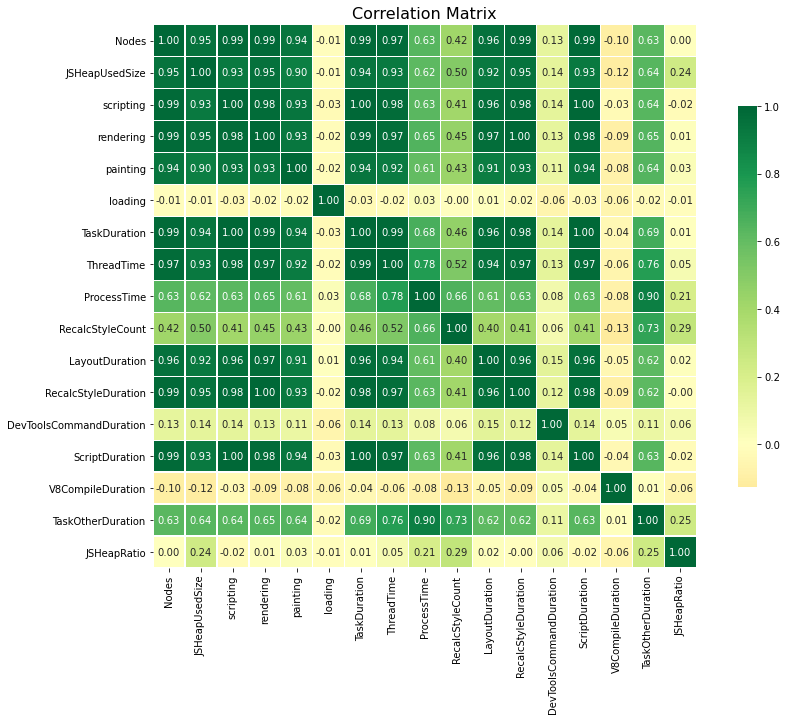

In [57]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def correlation_heatmap(train, method='pearson'):
    correlations = train.corr(method)

    fig, ax = plt.subplots(figsize=(15,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70},cmap='RdYlGn')
    plt.title('Correlation Matrix', fontsize=16);
    plt.show();
    
correlation_heatmap(corrdf) 

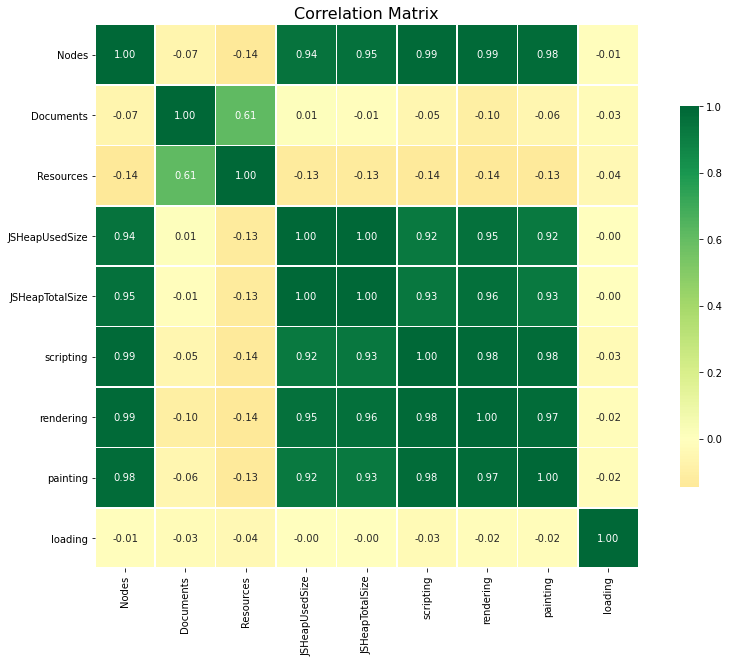

In [295]:
correlation_heatmap(corrdf,'spearman')

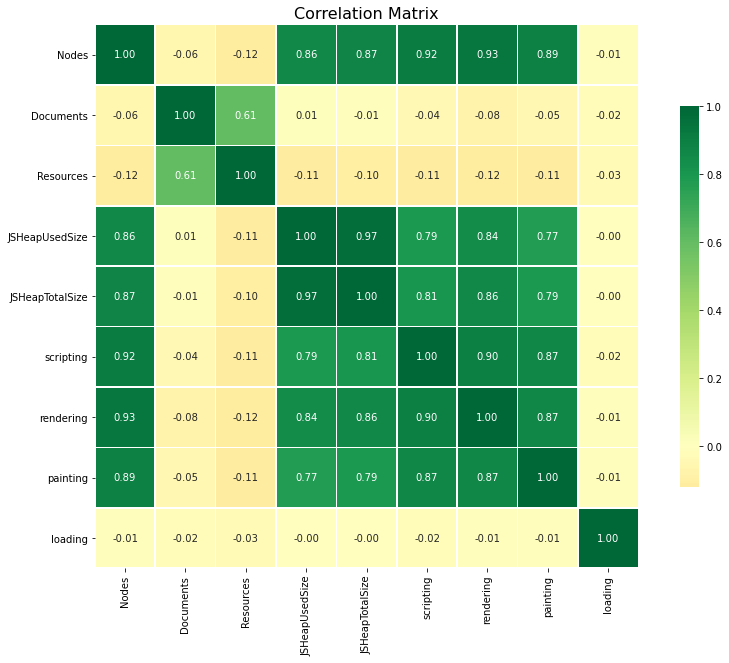

In [296]:
correlation_heatmap(corrdf,'kendall')

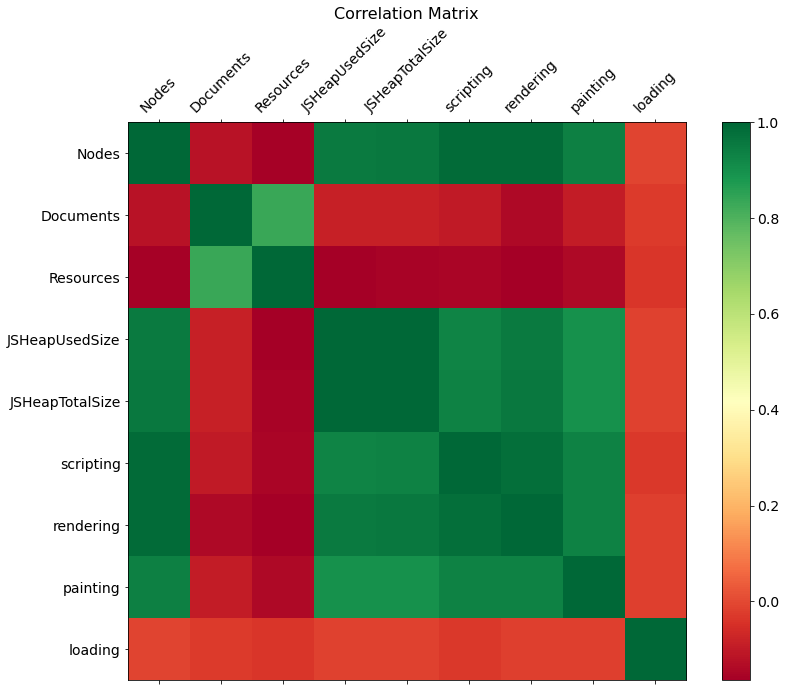

In [297]:
# cmap = ListedColormap(['r','g'])
f = plt.figure(figsize=(13, 10))
plt.matshow(corrdf.corr(), fignum=f.number, cmap='RdYlGn') #cmap=cmap
plt.xticks(range(corrdf.shape[1]), corrdf.columns, fontsize=14, rotation=45)
plt.yticks(range(corrdf.shape[1]), corrdf.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [298]:
corrdf.corr('spearman')

,Nodes,Documents,Resources,JSHeapUsedSize,JSHeapTotalSize,scripting,rendering,painting,loading
Nodes,1.000000,-0.067920,-0.144152,0.943421,0.951788,0.988398,0.989157,0.981410,-0.010527
Documents,-0.067920,1.000000,0.607221,0.011050,-0.013311,-0.053927,-0.100121,-0.056887,-0.026283
Resources,-0.144152,0.607221,1.000000,-0.130308,-0.125145,-0.138509,-0.144584,-0.133953,-0.040095
JSHeapUsedSize,0.943421,0.011050,-0.130308,1.000000,0.998306,0.920304,0.954334,0.919593,-0.002569
JSHeapTotalSize,0.951788,-0.013311,-0.125145,0.998306,1.000000,0.929805,0.963354,0.928262,-0.003902
scripting,0.988398,-0.053927,-0.138509,0.920304,0.929805,1.000000,0.982625,0.976474,-0.031957
rendering,0.989157,-0.100121,-0.144584,0.954334,0.963354,0.982625,1.000000,0.973846,-0.019867
painting,0.981410,-0.056887,-0.133953,0.919593,0.928262,0.976474,0.973846,1.000000,-0.020827
loading,-0.010527,-0.026283,-0.040095,-0.002569,-0.003902,-0.031957,-0.019867,-0.020827,1.000000


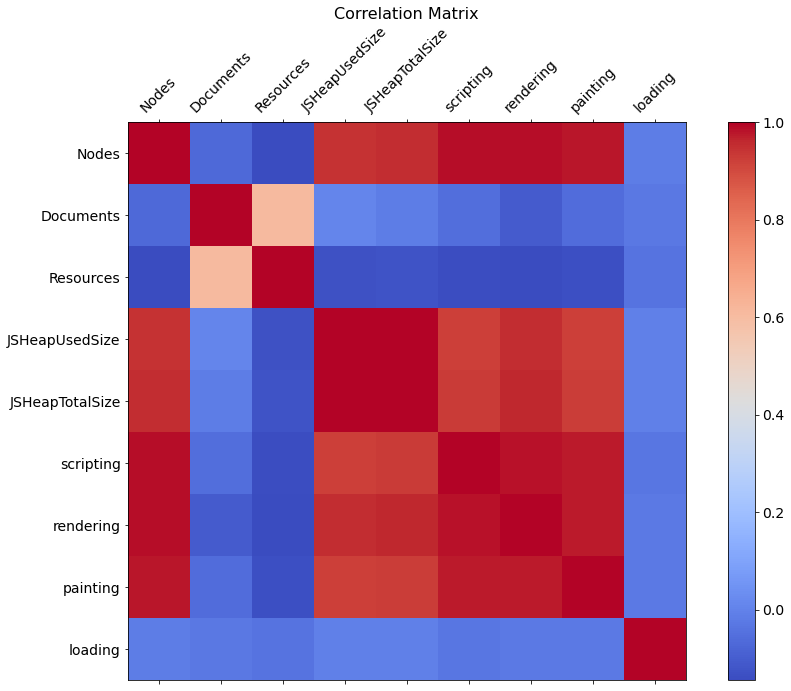

In [299]:
f = plt.figure(figsize=(15, 10))
plt.matshow(corrdf.corr('spearman'), fignum=f.number, cmap='coolwarm') #cmap=cmap
plt.xticks(range(corrdf.shape[1]), corrdf.columns, fontsize=14, rotation=45)
plt.yticks(range(corrdf.shape[1]), corrdf.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

## Regression on this dataset

In [300]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [301]:
#INSERT YOUR CODE TO BUILD AND COMPILE THE MODEL HERE
def reg_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.RMSprop(0.001)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model
    #YOU CAN ALSO CHANGE THE MODEL TRAINING PARAMETERS BELOW

In [302]:
model_data = corrdf.drop(columns=['loading','Documents','Resources'])
model_data

,Nodes,JSHeapUsedSize,JSHeapTotalSize,scripting,rendering,painting
0,11839.0,578982240.0,606568448.0,4024.107,258.527,29.821
0,11839.0,578974656.0,606044160.0,3992.477,246.942,34.918
0,11839.0,578975932.0,605782016.0,4019.479,245.804,29.737
0,11839.0,579004920.0,606830592.0,3999.914,245.636,31.246
0,11839.0,578979804.0,606306304.0,4620.789,270.111,33.084
...,...,...,...,...,...,...
0,7331.0,567883836.0,590499840.0,4224.692,169.569,16.675
0,7331.0,567831628.0,590499840.0,3872.961,166.847,23.788
0,7331.0,568042836.0,590499840.0,3870.943,171.404,18.046
0,7331.0,567949748.0,590499840.0,3879.705,167.397,36.460


In [303]:
train_dataset = model_data.iloc[:400]
test_dataset = model_data.iloc[400:]

In [304]:
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Nodes,400.0,2.725721e+04,1.516037e+04,1.419000e+03,1.408075e+04,2.788800e+04,3.856675e+04,5.400600e+04
JSHeapUsedSize,400.0,6.410953e+08,8.308513e+07,4.877208e+08,5.930578e+08,6.283301e+08,6.980581e+08,8.129797e+08
JSHeapTotalSize,400.0,6.712553e+08,8.681762e+07,5.092352e+08,6.207652e+08,6.602998e+08,7.309793e+08,8.496783e+08
scripting,400.0,5.474613e+03,1.261110e+03,3.170390e+03,4.420377e+03,5.535136e+03,6.473174e+03,7.795689e+03
rendering,400.0,5.512475e+02,2.746815e+02,5.819000e+01,2.924992e+02,5.949010e+02,7.368715e+02,1.069410e+03
painting,400.0,9.107540e+01,5.464218e+01,7.037000e+00,4.226625e+01,8.612450e+01,1.310863e+02,3.011640e+02


In [305]:
train_labels = train_dataset.pop('Nodes')
test_labels = test_dataset.pop('Nodes')

In [306]:
len(train_dataset),len(test_dataset)

(400, 108)

In [307]:
normed_train_data.head()

,JSHeapTotalSize,JSHeapUsedSize,ProcessTime,TaskDuration,ThreadTime,painting,rendering,scripting
0,-0.745089,-0.747583,-1.187922,-1.188393,-1.161712,-1.121009,-1.065672,-1.150182
0,-0.751128,-0.747674,-1.155884,-1.203583,-1.157991,-1.027730,-1.107848,-1.175263
0,-0.754147,-0.747659,-1.107828,-1.182386,-1.147685,-1.122547,-1.111991,-1.153852
0,-0.742069,-0.747310,-1.277626,-1.180870,-1.149408,-1.094931,-1.112603,-1.169366
0,-0.748108,-0.747612,-0.992494,-0.736069,-0.804087,-1.061294,-1.023500,-0.677042


In [308]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_train_data = normed_train_data.drop(columns='Nodes')
normed_test_data = norm(test_dataset)
normed_test_data = normed_test_data.drop(columns='Nodes')

In [309]:
model = reg_model()
early_stop=keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)

In [310]:
EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2,
  callbacks=[early_stop]
)

Epoch 1/1000
10/10 [==============================] - 0s 13ms/step - loss: 697936832.0000 - mae: 23567.9023 - mse: 697936832.0000 - val_loss: 2069055488.0000 - val_mae: 42010.2461 - val_mse: 2069055488.0000
Epoch 2/1000
10/10 [==============================] - 0s 5ms/step - loss: 697902080.0000 - mae: 23567.0527 - mse: 697902080.0000 - val_loss: 2068889600.0000 - val_mae: 42008.3828 - val_mse: 2068889600.0000
Epoch 3/1000
10/10 [==============================] - 0s 4ms/step - loss: 697866624.0000 - mae: 23566.2051 - mse: 697866624.0000 - val_loss: 2068715520.0000 - val_mae: 42006.3945 - val_mse: 2068715520.0000
Epoch 4/1000
10/10 [==============================] - 0s 4ms/step - loss: 697825728.0000 - mae: 23565.2285 - mse: 697825728.0000 - val_loss: 2068509056.0000 - val_mae: 42004.0586 - val_mse: 2068509056.0000
Epoch 5/1000
10/10 [==============================] - 0s 4ms/step - loss: 697775104.0000 - mae: 23564.0176 - mse: 697775104.0000 - val_loss: 2068244480.0000 - val_mae: 42001.0

Epoch 79/1000
10/10 [==============================] - 0s 4ms/step - loss: 634948864.0000 - mae: 22223.9746 - mse: 634948864.0000 - val_loss: 1766750592.0000 - val_mae: 38446.7773 - val_mse: 1766750592.0000
Epoch 80/1000
10/10 [==============================] - 0s 4ms/step - loss: 632948864.0000 - mae: 22186.2305 - mse: 632948864.0000 - val_loss: 1757245056.0000 - val_mae: 38329.3867 - val_mse: 1757245056.0000
Epoch 81/1000
10/10 [==============================] - 0s 4ms/step - loss: 630913408.0000 - mae: 22152.7422 - mse: 630913408.0000 - val_loss: 1747330304.0000 - val_mae: 38207.3672 - val_mse: 1747330304.0000
Epoch 82/1000
10/10 [==============================] - 0s 4ms/step - loss: 628849600.0000 - mae: 22120.3730 - mse: 628849600.0000 - val_loss: 1737499264.0000 - val_mae: 38085.4922 - val_mse: 1737499264.0000
Epoch 83/1000
10/10 [==============================] - 0s 4ms/step - loss: 626753152.0000 - mae: 22084.9883 - mse: 626753152.0000 - val_loss: 1727293696.0000 - val_mae: 379

Epoch 158/1000
10/10 [==============================] - 0s 4ms/step - loss: 383498528.0000 - mae: 17847.1602 - mse: 383498528.0000 - val_loss: 562068864.0000 - val_mae: 22650.3789 - val_mse: 562068864.0000
Epoch 159/1000
10/10 [==============================] - 0s 4ms/step - loss: 379400000.0000 - mae: 17758.0254 - mse: 379400000.0000 - val_loss: 544692544.0000 - val_mae: 22320.8125 - val_mse: 544692544.0000
Epoch 160/1000
10/10 [==============================] - 0s 4ms/step - loss: 375354048.0000 - mae: 17669.8594 - mse: 375354048.0000 - val_loss: 527685120.0000 - val_mae: 21990.6250 - val_mse: 527685120.0000
Epoch 161/1000
10/10 [==============================] - 0s 4ms/step - loss: 371304544.0000 - mae: 17580.9336 - mse: 371304544.0000 - val_loss: 510643872.0000 - val_mae: 21654.3652 - val_mse: 510643872.0000
Epoch 162/1000
10/10 [==============================] - 0s 4ms/step - loss: 367185472.0000 - mae: 17490.6719 - mse: 367185472.0000 - val_loss: 493305344.0000 - val_mae: 21303.7

Epoch 198/1000
10/10 [==============================] - 0s 4ms/step - loss: 217245280.0000 - mae: 13514.0986 - mse: 217245280.0000 - val_loss: 57817896.0000 - val_mae: 6536.1479 - val_mse: 57817896.0000
Epoch 199/1000
10/10 [==============================] - 0s 4ms/step - loss: 213307424.0000 - mae: 13384.7090 - mse: 213307424.0000 - val_loss: 53749024.0000 - val_mae: 6215.2891 - val_mse: 53749024.0000
Epoch 200/1000
10/10 [==============================] - 0s 4ms/step - loss: 209447200.0000 - mae: 13252.0488 - mse: 209447200.0000 - val_loss: 50488212.0000 - val_mae: 5973.6743 - val_mse: 50488212.0000
Epoch 201/1000
10/10 [==============================] - 0s 4ms/step - loss: 205583264.0000 - mae: 13120.0547 - mse: 205583264.0000 - val_loss: 47669864.0000 - val_mae: 5764.4854 - val_mse: 47669864.0000
Epoch 202/1000
10/10 [==============================] - 0s 4ms/step - loss: 201702368.0000 - mae: 12984.5840 - mse: 201702368.0000 - val_loss: 45573128.0000 - val_mae: 5601.0171 - val_mse:

In [311]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} Nodes".format(mae))

4/4 - 0s - loss: 804862912.0000 - mae: 24988.5488 - mse: 804862912.0000
Testing set Mean Abs Error: 24988.55 Nodes


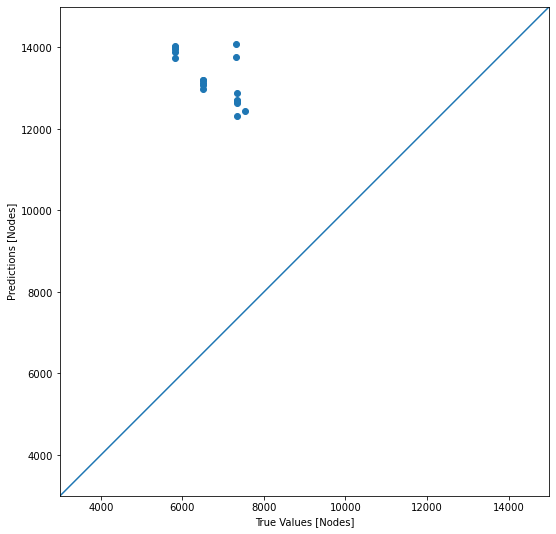

In [314]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Nodes]')
plt.ylabel('Predictions [Nodes]')
lims = [3000, 15000]
plt.xlim(lims)
plt.ylim(lims)
plt.gcf().set_size_inches((9,9))
_ = plt.plot(lims, lims)

In [315]:
test_labels

0    5815.0
0    5815.0
0    5815.0
0    5815.0
0    5815.0
      ...  
0    7331.0
0    7331.0
0    7331.0
0    7331.0
0    7548.0
Name: Nodes, Length: 108, dtype: float64

In [316]:
test_predictions

array([ 14030.975,  13958.536,  13741.924,  13890.784,  14019.522,
        77448.65 ,  73453.49 ,  99093.68 ,  78157.88 ,  92078.664,
        79668.86 ,  84932.82 ,  72869.68 ,  71711.375,  73042.48 ,
        69598.26 ,  73121.92 ,  69333.555,  70452.055,  70636.305,
        69843.06 ,  85496.86 ,  68599.34 ,  69103.016,  71473.555,
        78429.805,  77066.34 ,  94785.51 ,  80699.82 ,  74896.75 ,
        75229.484,  76919.67 ,  77765.9  ,  79002.95 ,  80660.164,
        77559.086,  81584.89 ,  79841.06 ,  77500.555,  88276.71 ,
        76029.69 ,  77378.9  ,  77094.055,  83549.266,  78234.74 ,
        87221.68 ,  81503.24 ,  83026.48 ,  88315.27 ,  85835.94 ,
        82444.445,  80802.44 , 122857.64 ,  83580.805,  81341.71 ,
        12987.675,  13067.254,  13195.288,  13128.304,  13189.628,
        99754.3  , 124709.414,  99318.61 , 100729.29 ,  96922.71 ,
        97576.13 ,  95832.9  ,  96474.11 ,  98302.   , 101386.54 ,
       112119.086, 110249.05 , 111203.64 , 109611.03 , 115850.

### With ADAM intead of RMSProp

In [324]:
#INSERT YOUR CODE TO BUILD AND COMPILE THE MODEL HERE
def reg_adam_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
        layers.Dense(32, activation='relu'),
        layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.Adam(0.01)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model
    #YOU CAN ALSO CHANGE THE MODEL TRAINING PARAMETERS BELOW

In [327]:
model = reg_adam_model()
early_stop=keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)

In [328]:
EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2,
  callbacks=[early_stop]
)

Epoch 1/1000
10/10 [==============================] - 0s 12ms/step - loss: 697871424.0000 - mae: 23566.2969 - mse: 697871424.0000 - val_loss: 2067930368.0000 - val_mae: 41997.6172 - val_mse: 2067930368.0000
Epoch 2/1000
10/10 [==============================] - 0s 4ms/step - loss: 697301504.0000 - mae: 23551.8906 - mse: 697301504.0000 - val_loss: 2062955904.0000 - val_mae: 41939.7930 - val_mse: 2062955904.0000
Epoch 3/1000
10/10 [==============================] - 0s 4ms/step - loss: 695368384.0000 - mae: 23502.3945 - mse: 695368384.0000 - val_loss: 2048836352.0000 - val_mae: 41773.8398 - val_mse: 2048836352.0000
Epoch 4/1000
10/10 [==============================] - 0s 4ms/step - loss: 690539584.0000 - mae: 23375.1133 - mse: 690539584.0000 - val_loss: 2017589504.0000 - val_mae: 41402.3633 - val_mse: 2017589504.0000
Epoch 5/1000
10/10 [==============================] - 0s 4ms/step - loss: 680534464.0000 - mae: 23115.6172 - mse: 680534464.0000 - val_loss: 1959570688.0000 - val_mae: 40701.4

In [329]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} Nodes".format(mae))

4/4 - 0s - loss: 837124928.0000 - mae: 25937.2656 - mse: 837124928.0000
Testing set Mean Abs Error: 25937.27 Nodes


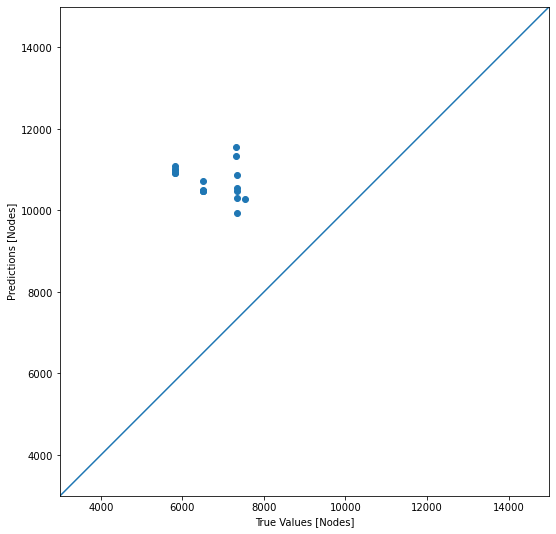

In [330]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Nodes]')
plt.ylabel('Predictions [Nodes]')
lims = [3000, 15000]
plt.xlim(lims)
plt.ylim(lims)
plt.gcf().set_size_inches((9,9))
_ = plt.plot(lims, lims)

# Writing a flexible hyperparameter search model

In [393]:
#INSERT YOUR CODE TO BUILD AND COMPILE THE MODEL HERE
def flex_reg_model(optimizer='Adam',activation='relu'):
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=[len(train_dataset.keys())]),
        layers.Dense(32,activation='relu'),
        layers.Dense(1)
    ])

    optimizer = tf.keras.optimizers.Adam(0.01)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model
    #YOU CAN ALSO CHANGE THE MODEL TRAINING PARAMETERS BELOW

In [394]:
model = flex_reg_model()
early_stop=keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)

In [395]:
EPOCHS = 1000

history = model.fit(
  normed_train_data, train_labels,
  epochs=EPOCHS, validation_split = 0.2,batch_size=128,
  callbacks=[early_stop]
)

Epoch 1/1000
3/3 [==============================] - 0s 35ms/step - loss: 697937536.0000 - mae: 23567.7539 - mse: 697937536.0000 - val_loss: 2068981760.0000 - val_mae: 42009.2578 - val_mse: 2068981760.0000
Epoch 2/1000
3/3 [==============================] - 0s 10ms/step - loss: 697873216.0000 - mae: 23566.1211 - mse: 697873216.0000 - val_loss: 2068595968.0000 - val_mae: 42004.7695 - val_mse: 2068595968.0000
Epoch 3/1000
3/3 [==============================] - 0s 8ms/step - loss: 697770112.0000 - mae: 23563.5293 - mse: 697770112.0000 - val_loss: 2067934208.0000 - val_mae: 41997.1055 - val_mse: 2067934208.0000
Epoch 4/1000
3/3 [==============================] - 0s 8ms/step - loss: 697606016.0000 - mae: 23559.3438 - mse: 697606016.0000 - val_loss: 2066888704.0000 - val_mae: 41985.0000 - val_mse: 2066888704.0000
Epoch 5/1000
3/3 [==============================] - 0s 7ms/step - loss: 697348992.0000 - mae: 23552.8730 - mse: 697348992.0000 - val_loss: 2065330432.0000 - val_mae: 41966.9609 - val

In [396]:
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} Nodes".format(mae))

4/4 - 0s - loss: 179142013296968158284873728.0000 - mae: 13228499271680.0000 - mse: 179142013296968158284873728.0000
Testing set Mean Abs Error: 13228499271680.00 Nodes


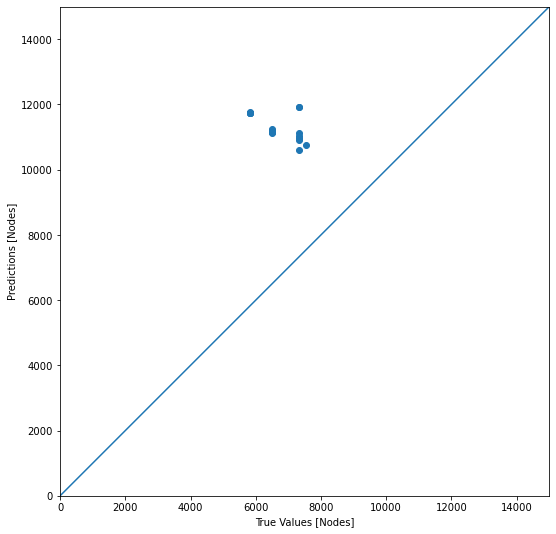

In [408]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Nodes]')
plt.ylabel('Predictions [Nodes]')
lims = [0, 15000]
plt.xlim(lims)
plt.ylim(lims)
plt.gcf().set_size_inches((9,9))
_ = plt.plot(lims, lims)

In [402]:
sample_test = np.array(normed_train_data.iloc[50]).reshape((1,5))
sample_test

array([[-0.42030595, -0.37776802, -0.97555406, -0.98704312, -0.95867842]])

In [403]:
normed_test_data.shape, sample_test.shape

((108, 5), (1, 5))

In [404]:
model.predict(sample_test), train_labels.iloc[50]

(array([[9239.249]], dtype=float32), 13856.0)

# End bookmark